## Student Performance Indicator 

Life cycle of the Machine Learning Project 

- Understand the Problem Statement  
- Data Collection 
- Data validation 
- Pre-processing and EDA 
- Model Training 
- Model Evaluation and Selection 

### 1. Problem Statement 
- Determine the relationship of student's performance (test score) and various other features and identifty predictors and create a prediction model. 

### 2. Data Collection 
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The dimensions of the data set are 1000 by 8 

### 2.1. Import Data and Required Packages 

In [1]:
import os 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

Import data

In [2]:
import sys

print(sys.executable)




c:\Users\jeffd\OneDrive\AP Statistics\Desktop\End_to_End_Project\venv\python.exe


In [3]:
# Construct the file path using os.path.join
file_path = os.path.join(os.getcwd(), 'data', 'student.csv')

# Read the CSV file into a DataFrame using pandas
df = pd.read_csv(file_path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

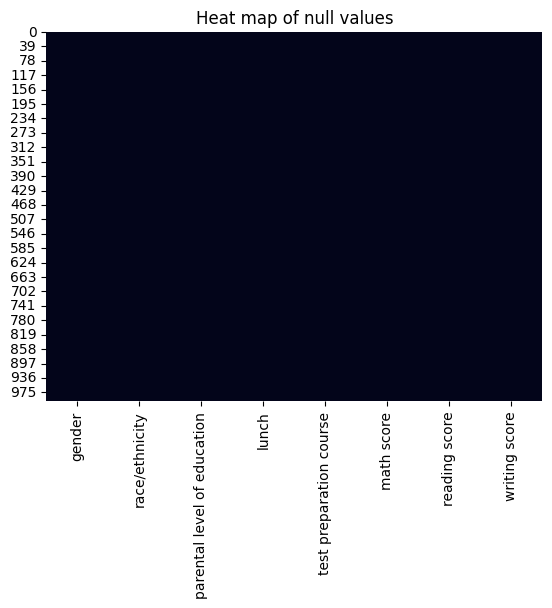

In [5]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heat map of null values')
plt.show()

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
duplicates = df[df.duplicated()]
duplicates

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique() 

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
numerical = [col for col in df.columns if df[col].dtype != 'object']
categorical = [col for col in df.columns if df[col].dtype == 'object']

numerical_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['object'])



# Examine Categorical Levels 

In [12]:
def plot_categorical_vars(df, cat_vars):
    for var in cat_vars:
        counts = df[var].value_counts()
        plt.bar(counts.index, counts.values)
        plt.title(var)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        for i, v in enumerate(counts.values):
            plt.text(i, v, str(v), color='blue', fontweight='bold')
        plt.show()

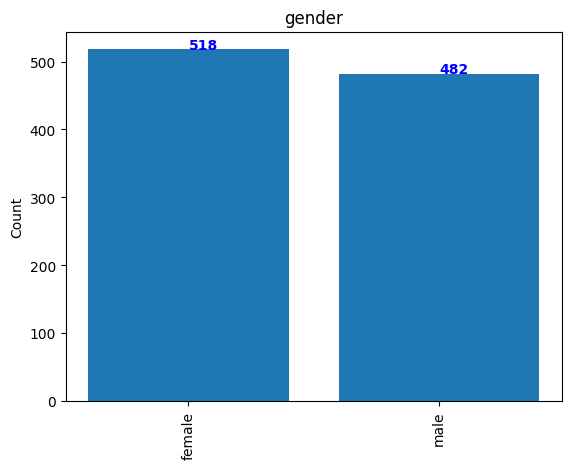

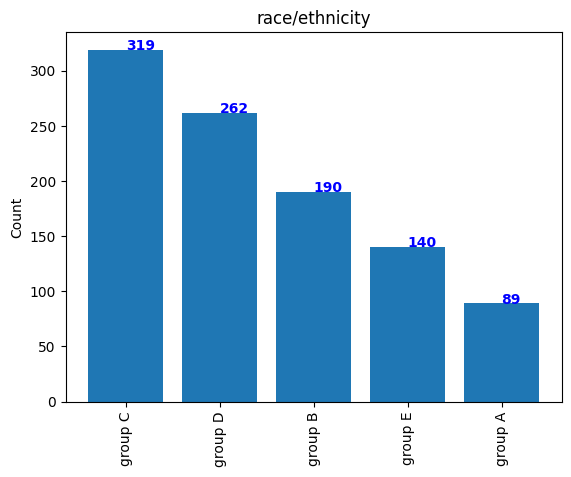

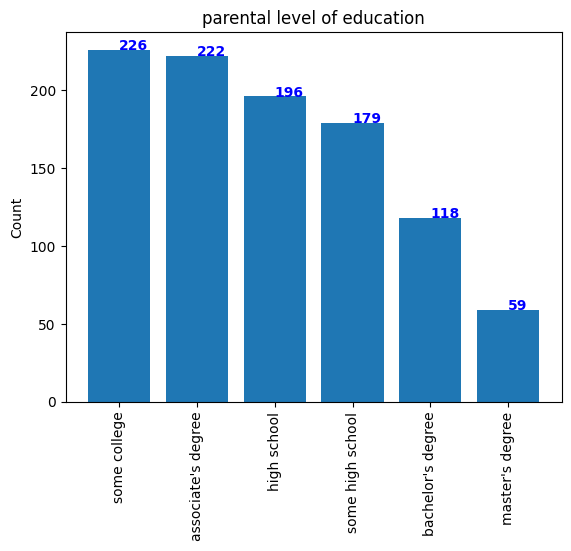

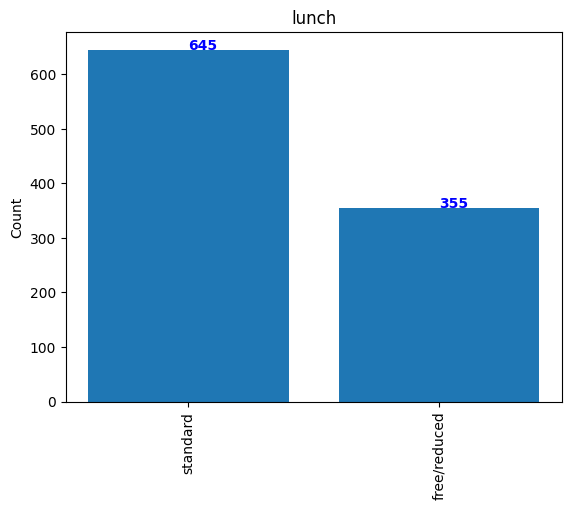

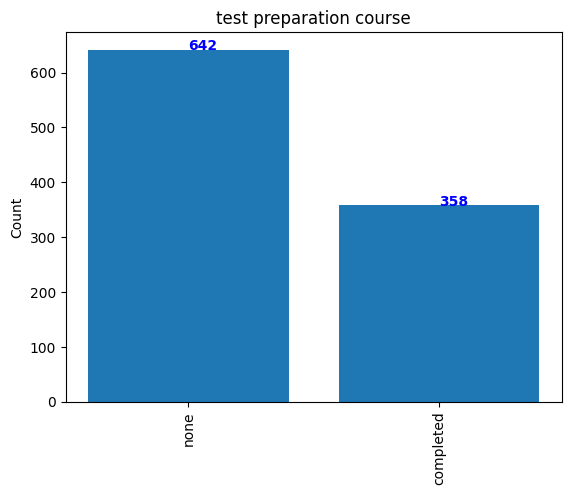

In [13]:
plot_categorical_vars(df, categorical)

# Univariate Analysis

In [14]:
def desc_viz(df, num_cols):
    for column_name in num_cols: 
        stats = df[column_name].describe().to_frame() 
        stats.loc['skewness'] = df[column_name].skew()
        print(f'Descriptives Statistics for {column_name}:')
        print(stats)
        
        
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize =(10,5))
        
        sns.boxplot(x=column_name, data =df, ax = ax1)
        ax1.set_title(f'Boxplot for {column_name}')
        
        sns.histplot(x=column_name, data=df, ax = ax2)
        ax2.set_title(f'Histplot for {column_name}')
        
        plt.show() 

Descriptives Statistics for math score:
           math score
count     1000.000000
mean        66.089000
std         15.163080
min          0.000000
25%         57.000000
50%         66.000000
75%         77.000000
max        100.000000
skewness    -0.278935


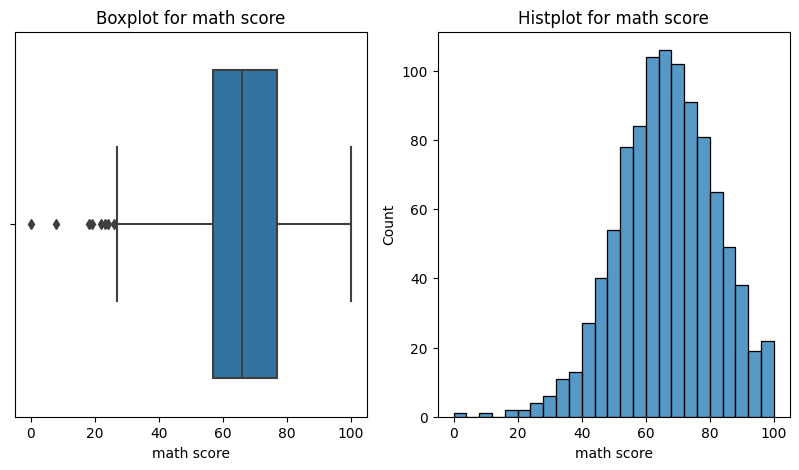

Descriptives Statistics for reading score:
          reading score
count       1000.000000
mean          69.169000
std           14.600192
min           17.000000
25%           59.000000
50%           70.000000
75%           79.000000
max          100.000000
skewness      -0.259105


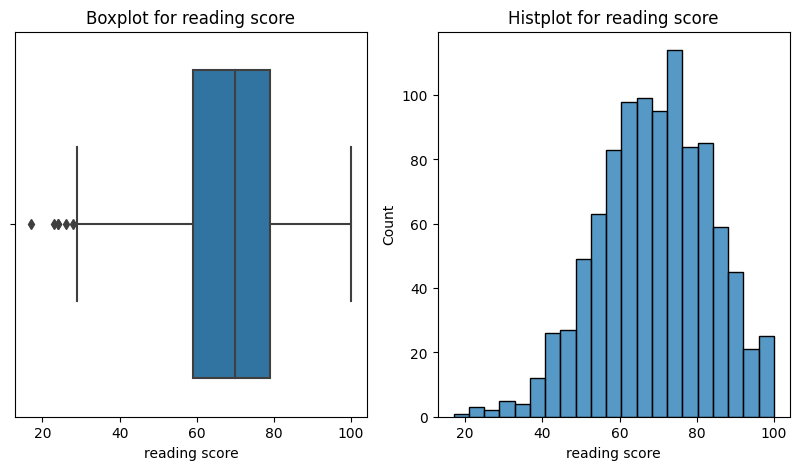

Descriptives Statistics for writing score:
          writing score
count       1000.000000
mean          68.054000
std           15.195657
min           10.000000
25%           57.750000
50%           69.000000
75%           79.000000
max          100.000000
skewness      -0.289444


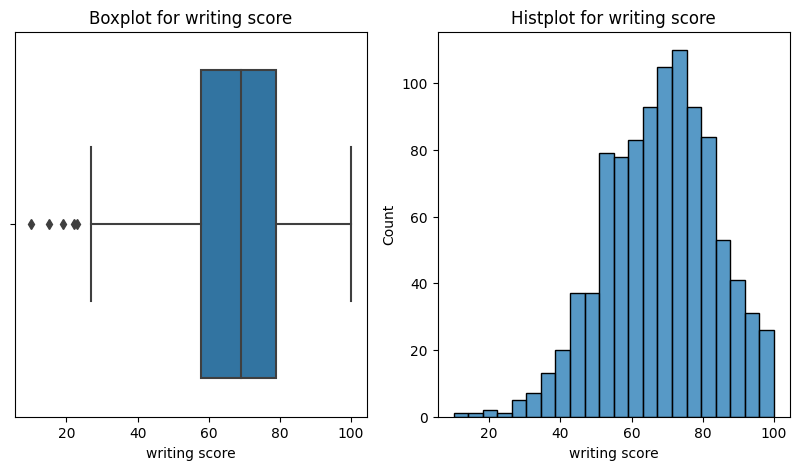

In [15]:
desc_viz(df, numerical)

# Bivariate Analysis 

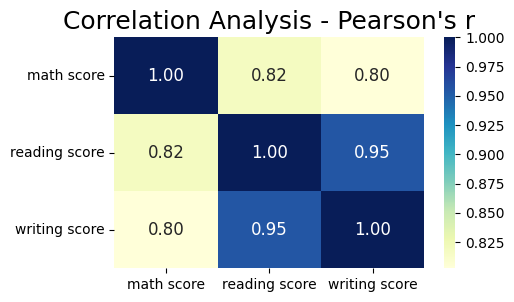

In [16]:
corr = numerical_df.corr() 


plt.figure(figsize = (5, 3))
sns.heatmap(corr, cmap = 'YlGnBu', annot=True, annot_kws={'size':12}, fmt='.2f')
plt.title("Correlation Analysis - Pearson's r", fontsize = 18)
plt.show() 

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 

# Create Columns for "Total Score" and "Average"

In [18]:
df['total_score'] = df['math score'] + df["reading score"] + df['writing score']
df['average'] = df['total_score']/3 
df['average'] = round(df['average'], 2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [19]:
df.describe()

,math score,reading score,writing score,total_score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770580
std,15.16308,14.600192,15.195657,42.771978,14.257311
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.330000
50%,66.00000,70.000000,69.000000,205.000000,68.330000
75%,77.00000,79.000000,79.000000,233.000000,77.670000
max,100.00000,100.000000,100.000000,300.000000,100.000000


# Examine the Average Score For Each Category

In [20]:
def avg_cat(df, col): 
    return df.groupby(col)['average'].mean() 

results = {} 

for col in categorical:
    results[col] = avg_cat(df, col)
    
    
results_df = pd.DataFrame(results)

results_df 

,gender,race/ethnicity,parental level of education,lunch,test preparation course
associate's degree,NaN,NaN,69.568964,NaN,NaN
bachelor's degree,NaN,NaN,71.923983,NaN,NaN
completed,NaN,NaN,NaN,NaN,72.669469
female,69.569498,NaN,NaN,NaN,NaN
free/reduced,NaN,NaN,NaN,62.198986,NaN
group A,NaN,62.992135,NaN,NaN,NaN
group B,NaN,65.468579,NaN,NaN,NaN
group C,NaN,67.131567,NaN,NaN,NaN
group D,NaN,69.179389,NaN,NaN,NaN
group E,NaN,72.752000,NaN,NaN,NaN


In [21]:
def plot_avg(df, cat_cols, target_col): 
    fig, ax = plt.subplots(len(cat_cols), 1, figsize=(12, 6*len(cat_cols)))
    for i, col in enumerate(cat_cols): 
        sns.boxplot(x=col, y=target_col, data=df, ax=ax[i], showfliers=False, palette="Set3")
        ax[i].set_title(f'Average Score for {col}')
        ax[i].set_ylabel('Average Score')
        ax[i].set_xlabel(f'{col}')
        



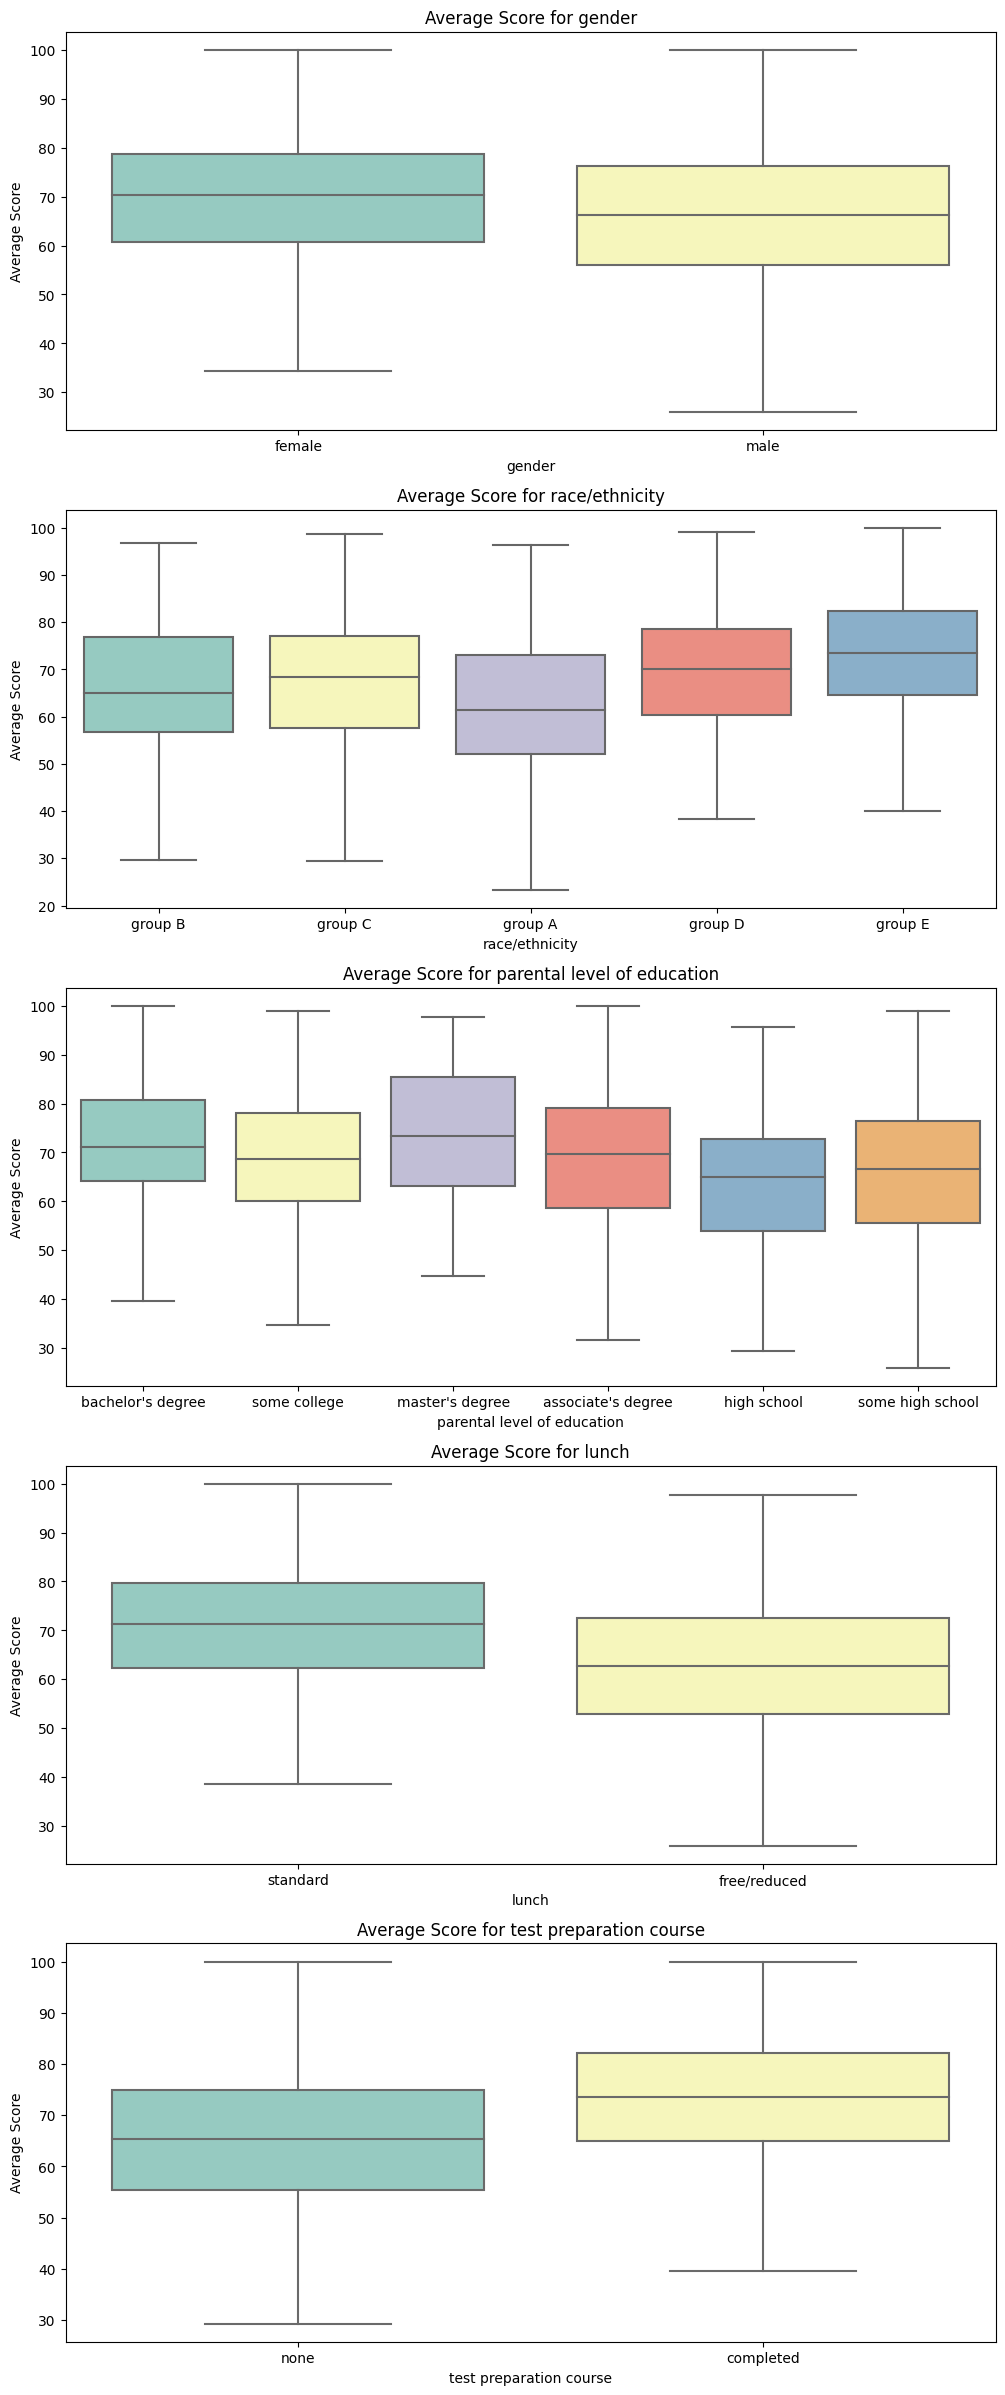

In [22]:
plot_avg(df, categorical, 'average')

In [23]:
df['average'].describe()

count    1000.000000
mean       67.770580
std        14.257311
min         9.000000
25%        58.330000
50%        68.330000
75%        77.670000
max       100.000000
Name: average, dtype: float64

# Examine Total Score by Category

In [24]:
df['total_score'].describe()


count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: total_score, dtype: float64

In [25]:
def tot_cat(df, col): 
    return df.groupby(col)['total_score'].mean()

results = {} 

for col in categorical:
    results[col] = tot_cat(df, col)
    
    
results_df = pd.DataFrame(results)

results_df 

,gender,race/ethnicity,parental level of education,lunch,test preparation course
associate's degree,NaN,NaN,208.707207,NaN,NaN
bachelor's degree,NaN,NaN,215.771186,NaN,NaN
completed,NaN,NaN,NaN,NaN,218.008380
female,208.708494,NaN,NaN,NaN,NaN
free/reduced,NaN,NaN,NaN,186.597183,NaN
group A,NaN,188.977528,NaN,NaN,NaN
group B,NaN,196.405263,NaN,NaN,NaN
group C,NaN,201.394984,NaN,NaN,NaN
group D,NaN,207.538168,NaN,NaN,NaN
group E,NaN,218.257143,NaN,NaN,NaN


In [26]:
def plot_tot(df, cat_cols, target_col): 
    fig, ax = plt.subplots(len(cat_cols), 1, figsize=(12, 6*len(cat_cols)))
    for i, col in enumerate(cat_cols): 
        sns.boxplot(x=col, y=target_col, data=df, ax=ax[i], showfliers=False, palette="Set3")
        ax[i].set_title(f'Total Score for {col}')
        ax[i].set_ylabel('Total Score')
        ax[i].set_xlabel(f'{col}')
        

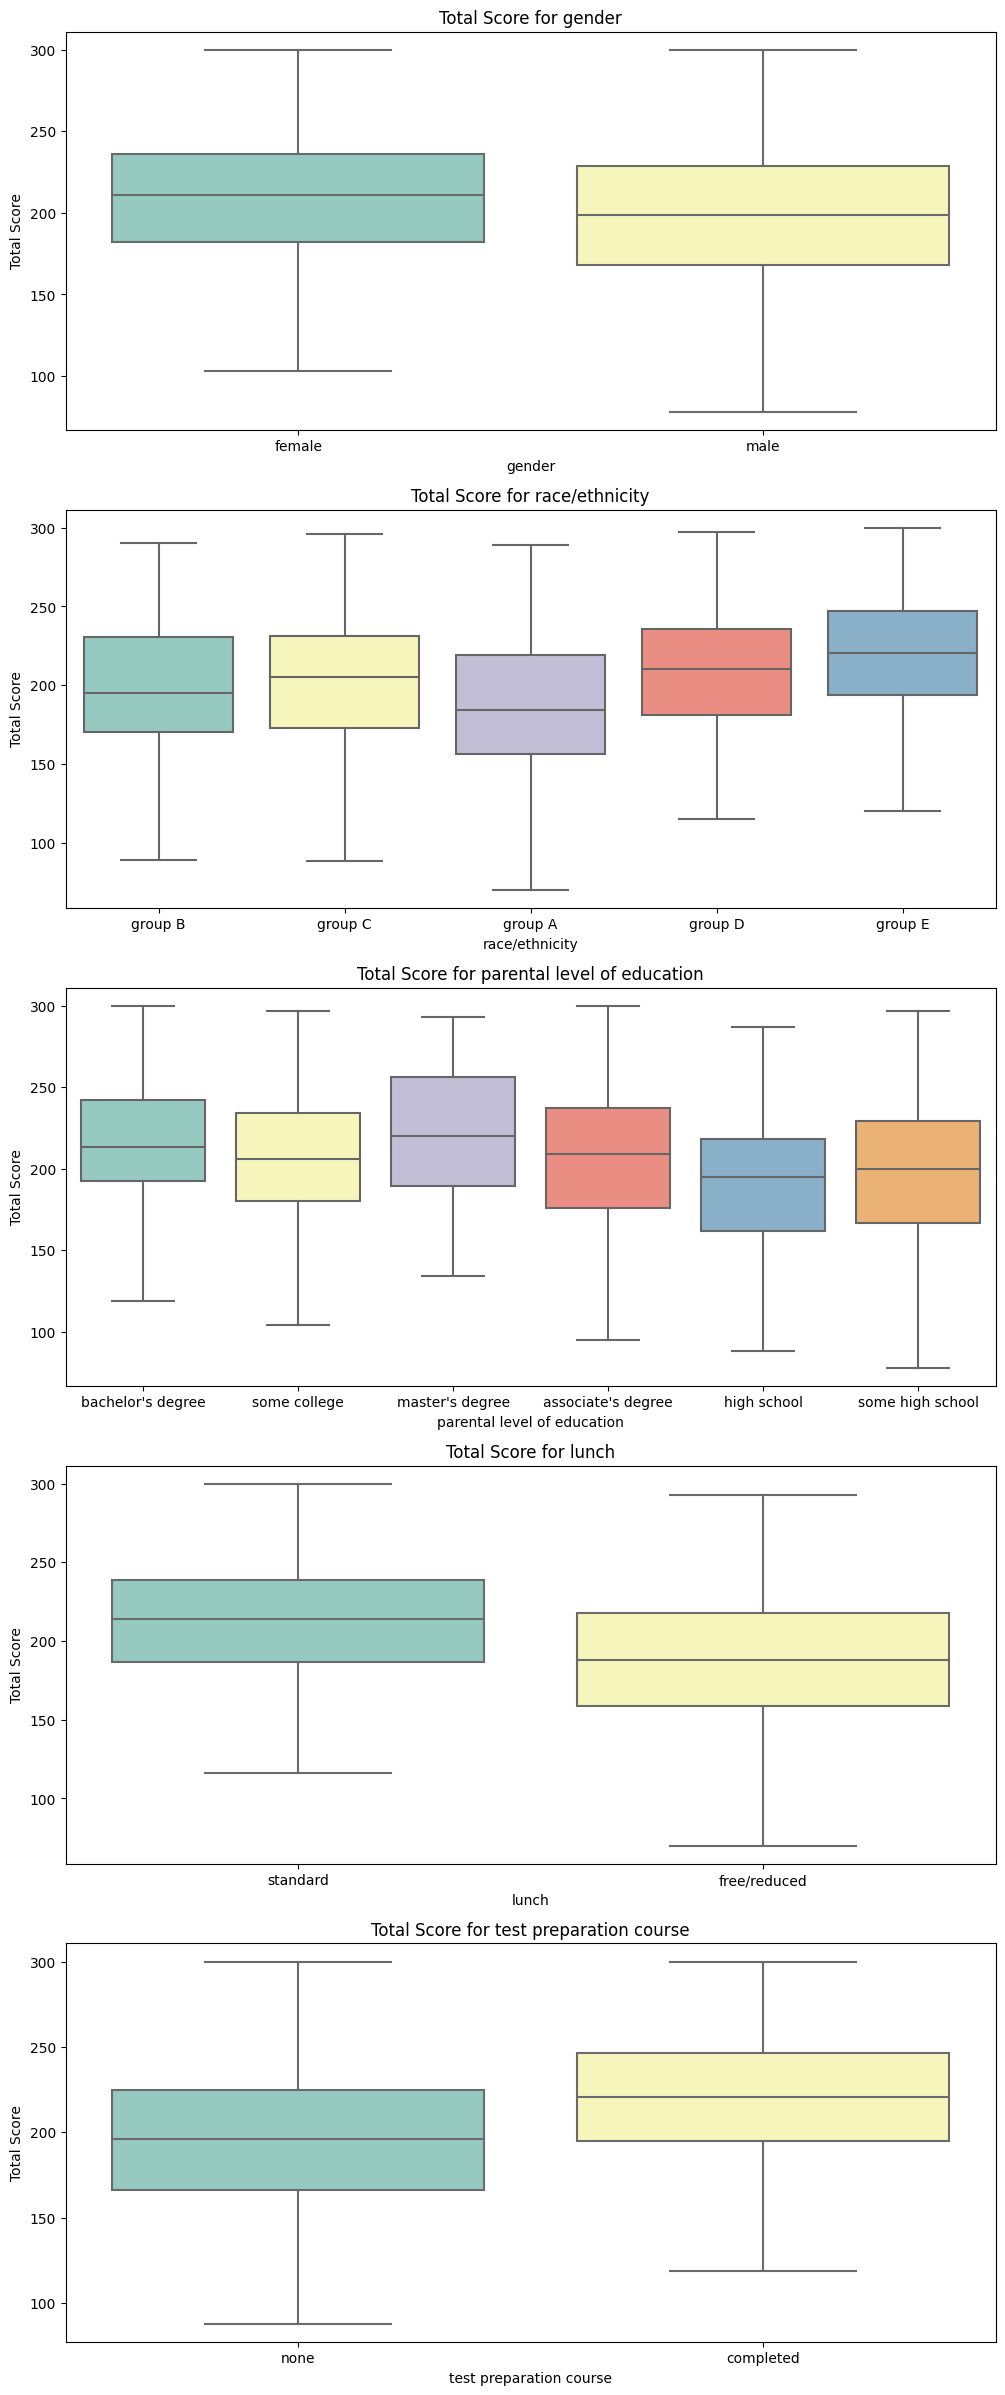

In [27]:
plot_tot(df, categorical, 'total_score')

In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [29]:
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
num_df = df[num_cols]

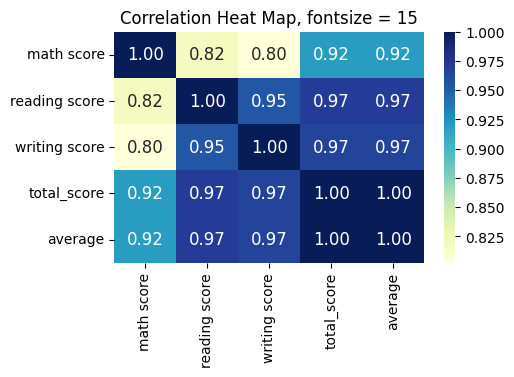

In [30]:
corr = num_df.corr()

plt.figure(figsize = (5,3))
sns.heatmap(corr, cmap='YlGnBu', annot=True, annot_kws={'size':12}, fmt='.2f')
plt.title('Correlation Heat Map, fontsize = 15')
plt.show()

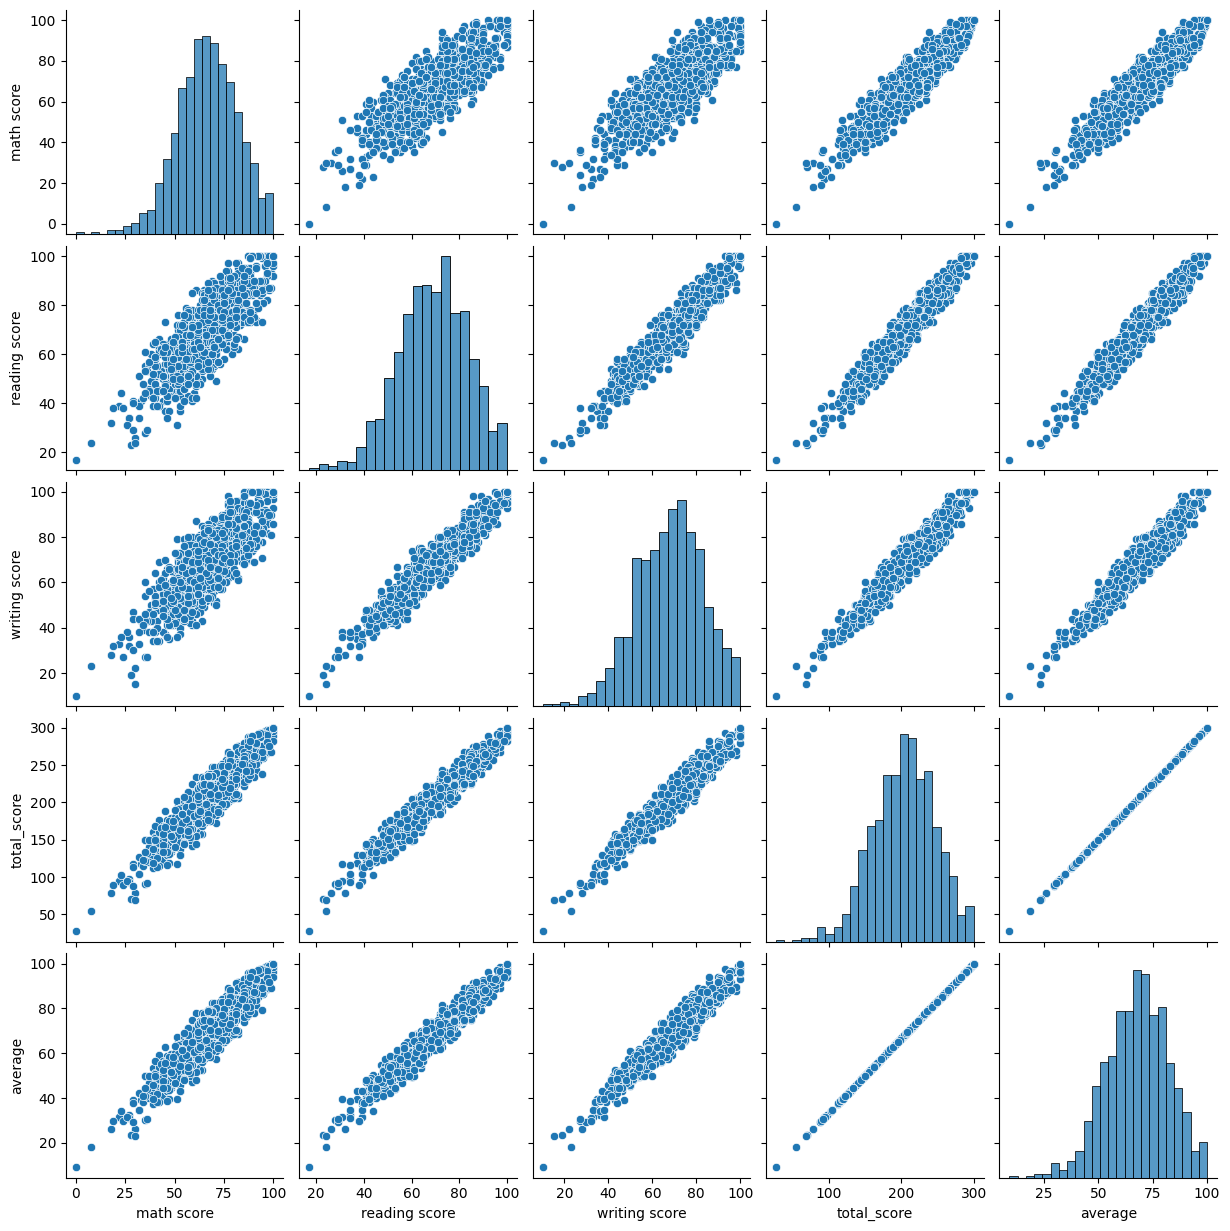

In [31]:
sns.pairplot(df)

In [32]:
#outliers 

for col in num_cols:
    # Calculate the IQR (interquartile range) of the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the upper and lower bounds of the column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify and remove outliers in the column
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_df = pd.DataFrame(outliers)
    #df_no_outliers = df.drop(outliers)
    outliers_df

In [33]:
outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.00
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.00
76,male,group E,some high school,standard,none,30,26,22,78,26.00
327,male,group A,some college,free/reduced,none,28,23,19,70,23.33
596,male,group B,high school,free/reduced,none,30,24,15,69,23.00
980,female,group B,high school,free/reduced,none,8,24,23,55,18.33


In [34]:
# Calculate the total threshold for the top 20%
total_threshold = df['total_score'].quantile(0.8)

# Create a boolean mask for the top 20% of total
top_20_percent = df['total_score'] >= total_threshold

# Get the subset of the data corresponding to the top 20% 
top_20_percent_data = df[top_20_percent]

top_20_percent_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
6,female,group B,some college,standard,completed,88,95,92,275,91.67
16,male,group C,high school,standard,none,88,89,86,263,87.67
34,male,group E,some college,standard,none,97,87,82,266,88.67
...,...,...,...,...,...,...,...,...,...,...
982,male,group B,some high school,standard,completed,79,85,86,250,83.33
983,female,group A,some college,standard,completed,78,87,91,256,85.33
990,male,group E,high school,free/reduced,completed,86,81,75,242,80.67
995,female,group E,master's degree,standard,completed,88,99,95,282,94.00


In [35]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [36]:
# Rename the columns
new_cols = {}
for col in df.columns:
    if '/' in col or ' ' in col:
        # Replace special characters with underscores
        new_col = col.replace('/', '_').replace(' ', '_')
    else:
        # Keep only the first word
        new_col = col.split()[0]
    new_cols[col] = new_col

df = df.rename(columns=new_cols)

In [37]:
# Replace spaces, "/", and apostrophes with underscores in column data
df = df.replace({' ': '_', '/': '_', "'": ''}, regex=True)

# Print the modified dataframe
print(df)


     gender race_ethnicity parental_level_of_education         lunch   
0    female        group_B            bachelors_degree      standard  \
1    female        group_C                some_college      standard   
2    female        group_B              masters_degree      standard   
3      male        group_A           associates_degree  free_reduced   
4      male        group_C                some_college      standard   
..      ...            ...                         ...           ...   
995  female        group_E              masters_degree      standard   
996    male        group_C                 high_school  free_reduced   
997  female        group_C                 high_school  free_reduced   
998  female        group_D                some_college      standard   
999  female        group_D                some_college  free_reduced   

    test_preparation_course  math_score  reading_score  writing_score   
0                      none          72             72        

In [38]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group_B,bachelors_degree,standard,none,72,72,74,218,72.67
1,female,group_C,some_college,standard,completed,69,90,88,247,82.33
2,female,group_B,masters_degree,standard,none,90,95,93,278,92.67
3,male,group_A,associates_degree,free_reduced,none,47,57,44,148,49.33
4,male,group_C,some_college,standard,none,76,78,75,229,76.33


In [39]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['object'])

In [40]:
unique_values = [categorical_df[col].unique() for col in categorical_df.columns]

print(unique_values)

[array(['female', 'male'], dtype=object), array(['group_B', 'group_C', 'group_A', 'group_D', 'group_E'],
      dtype=object), array(['bachelors_degree', 'some_college', 'masters_degree',
       'associates_degree', 'high_school', 'some_high_school'],
      dtype=object), array(['standard', 'free_reduced'], dtype=object), array(['none', 'completed'], dtype=object)]


In [41]:
import statsmodels.api as sm
from scipy.stats import ttest_ind


# Perform t-tests
for column in df.columns[:-1]:
    unique_values = df[column].unique()
    if len(unique_values) == 2:
        group1 = df[df[column] == unique_values[0]]['average']
        group2 = df[df[column] == unique_values[1]]['average']
        t, p = ttest_ind(group1, group2)
        print(f"T-test for {column}: {unique_values[0]} vs {unique_values[1]}: t = {t:.2f}, p = {p:.4f}")
        

T-test for gender: female vs male: t = 4.17, p = 0.0000
T-test for lunch: standard vs free_reduced: t = 9.58, p = 0.0000
T-test for test_preparation_course: none vs completed: t = -8.39, p = 0.0000


In [42]:
import statsmodels.api as sm

# Perform ANOVA for the 'race_ethnicity' variable
formula = 'average ~ C(race_ethnicity)'
model = sm.formula.ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f"ANOVA for race_ethnicity:")
print(anova_table)
print(model.summary())



ANOVA for race_ethnicity:
                          sum_sq     df         F        PR(>F)
C(race_ethnicity)    7163.333294    4.0  9.095661  3.228179e-07
Residual           195904.307169  995.0       NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     9.096
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           3.23e-07
Time:                        11:15:48   Log-Likelihood:                -4057.8
No. Observations:                1000   AIC:                             8126.
Df Residuals:                     995   BIC:                             8150.
Df Model:                           4                                         
Covariance Type:            nonrobust                                  

In [43]:
# Perform ANOVA for parental level of education
model = sm.formula.ols('average ~ C(parental_level_of_education)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA for parental level of education:")
print(anova_table)
print(model.summary())


ANOVA for parental level of education:
                                       sum_sq     df          F        PR(>F)
C(parental_level_of_education)   10420.153338    5.0  10.752938  4.383102e-10
Residual                        192647.487126  994.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.75
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           4.38e-10
Time:                        11:15:48   Log-Likelihood:                -4049.4
No. Observations:                1000   AIC:                             8111.
Df Residuals:                     994   BIC:                             8140.
Df Model:                           5                                         
Covariance Type:

In [44]:
# Create a cross-tabulation table
ct = pd.crosstab(index=df['parental_level_of_education'], columns=df['race_ethnicity'])

# Print the cross-tabulation table
print(ct)

race_ethnicity               group_A  group_B  group_C  group_D  group_E
parental_level_of_education                                             
associates_degree                 14       41       78       50       39
bachelors_degree                  12       20       40       28       18
high_school                       18       48       64       44       22
masters_degree                     3        6       19       23        8
some_college                      18       37       69       67       35
some_high_school                  24       38       49       50       18


In [45]:
pd.crosstab(df['lunch'], df['race_ethnicity'])


race_ethnicity,group_A,group_B,group_C,group_D,group_E
lunch,,,,,
free_reduced,36,69,114,95,41
standard,53,121,205,167,99


In [46]:
pd.crosstab(df['test_preparation_course'], df['race_ethnicity'])

race_ethnicity,group_A,group_B,group_C,group_D,group_E
test_preparation_course,,,,,
completed,31,68,117,82,60
none,58,122,202,180,80


In [48]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group_B,bachelors_degree,standard,none,72,72,74,218,72.67
1,female,group_C,some_college,standard,completed,69,90,88,247,82.33
2,female,group_B,masters_degree,standard,none,90,95,93,278,92.67
3,male,group_A,associates_degree,free_reduced,none,47,57,44,148,49.33
4,male,group_C,some_college,standard,none,76,78,75,229,76.33


In [57]:
import os
import errno

file_path = "C:/Users/jeffd/OneDrive/AP Statistics/Desktop/End_to_End_Project/notebook/data/cleaned_data.csv"
if not os.path.exists(os.path.dirname(file_path)):
    try:
        os.makedirs(os.path.dirname(file_path))
    except OSError as exc:
        if exc.errno != errno.EEXIST:
            raise
df_cleaned = df.to_csv(file_path, index=False)
